Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sea
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Benkyou/datasets ML/car_evaluation.csv')
df.columns = ['Buying', 'Maintainance', 'Doors', 'Persons', 'Trunk', 'Safety', 'Rating']
df

,Buying,Maintainance,Doors,Persons,Trunk,Safety,Rating
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


Checking the Dataframe for null values, abnormalities[ie 'more' n '5more' in 'Doors' and 'Persons' etc. So we can deal with it.

In [ ]:
print(df.isna().any())
print("Buying",df['Buying'].unique())
print("Trunk",df['Trunk'].unique())
print("Maintainance",df['Maintainance'].unique())
print("Safety",df['Safety'].unique())
print("Rating",df['Rating'].unique())
print("Door-",df['Doors'].unique())
print("Person",df['Persons'].unique())

Buying          False
Maintainance    False
Doors           False
Persons         False
Trunk           False
Safety          False
Rating          False
dtype: bool
Buying ['vhigh' 'high' 'med' 'low']
Trunk ['small' 'med' 'big']
Maintainance ['vhigh' 'high' 'med' 'low']
Safety ['med' 'high' 'low']
Rating ['unacc' 'acc' 'vgood' 'good']
Door- ['2' '3' '4' '5more']
Person ['2' '4' 'more']


No null value but abnormalities exist. Dealing with it oof..
Encoding from scratch. [Columns 'Doors' and 'Persons']

In [ ]:
df['Doors'] = df['Doors'].replace(['2','3','4','5more'],[2,3,4,5])
df['Persons'] = df['Persons'].replace(['2','4','more'],[2,4,5])
print("Door-",df['Doors'].unique())
print("Person",df['Persons'].unique())

Door- [2 3 4 5]
Person [2 4 5]


Label Encoding columns safety, rating, maintainance, buying, trunk. 

encoder = LabelEncoder()
df['Buying'] = encoder.fit_transform(df['Buying'])
df['Safety'] = encoder.fit_transform(df['Safety'])
df['Rating'] = encoder.fit_transform(df['Rating'])
df['Maintainance'] = encoder.fit_transform(df['Maintainance'])
df['Trunk'] = encoder.fit_transform(df['Trunk'])
df.head()

Data Visuaization 📊

Buying AxesSubplot(0.125,0.125;0.775x0.755)


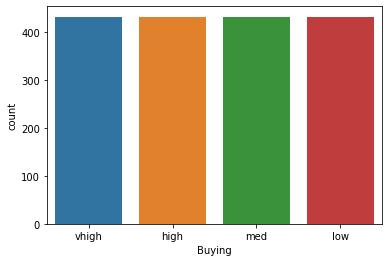

In [ ]:
print("Buying",sea.countplot(x=df['Buying']))

Maintainance AxesSubplot(0.125,0.125;0.775x0.755)


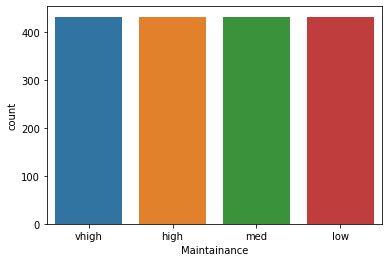

In [ ]:
print("Maintainance",sea.countplot(x=df['Maintainance']))

Doors:
 AxesSubplot(0.125,0.125;0.775x0.755)


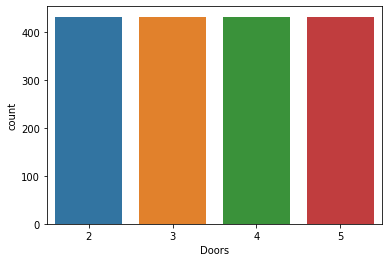

In [ ]:
print("Doors:\n",sea.countplot(x=df['Doors']))

Persons:
 AxesSubplot(0.125,0.125;0.775x0.755)


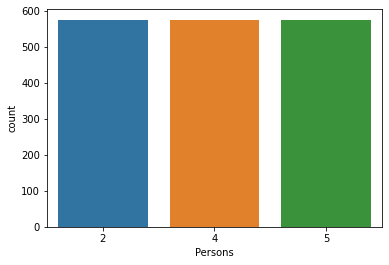

In [ ]:
print("Persons:\n",sea.countplot(x=df['Persons']))

Trunk:
 AxesSubplot(0.125,0.125;0.775x0.755)


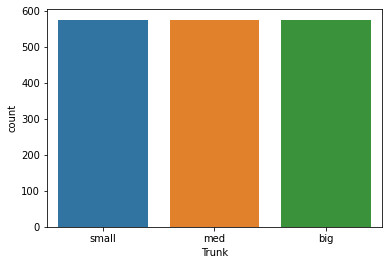

In [ ]:
print("Trunk:\n",sea.countplot(x=df['Trunk']))

Safety:
 AxesSubplot(0.125,0.125;0.775x0.755)


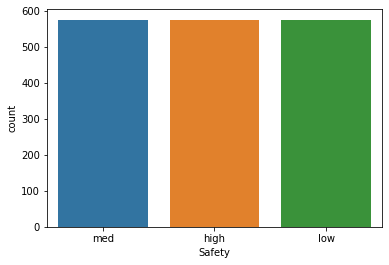

In [ ]:
print("Safety:\n",sea.countplot(x=df['Safety']))

Rating:
 AxesSubplot(0.125,0.125;0.775x0.755)


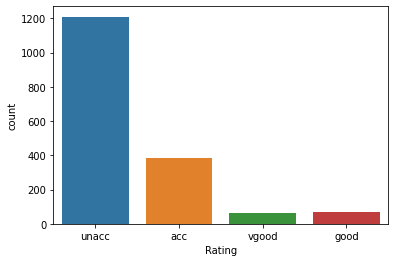

In [ ]:
print("Rating:\n",sea.countplot(x=df['Rating']))

In [ ]:
df['Buying'],_ = pd.factorize(df['Buying'])
df['Safety'],_ = pd.factorize(df['Safety'])
df['Maintainance'],_ =pd.factorize(df['Maintainance'])
df['Trunk'],_ = pd.factorize(df['Trunk'])

Correlation b/w Target[i.e 'Rating' vs other columns] and heat mapping it.

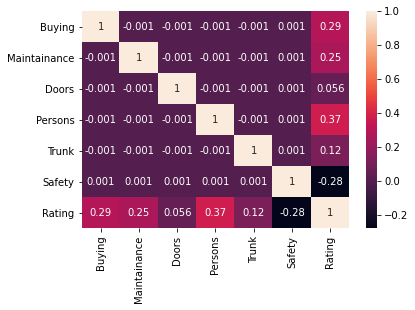

In [ ]:
cor = df.corr().round(3)
sea.heatmap(cor, annot=True)
plt.show()

Split the dataframe in X and Y!

In [ ]:
x = df.loc[:,['Buying', 'Maintainance', 'Doors', 'Persons', 'Trunk', 'Safety']]
y = df.loc[:,['Rating']]
#print(x.shape)
#print(x.head())
#print()
#print(y.head())
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 60)
x_test.shape

(519, 6)

Building the decision tree model.

In [ ]:
tree = dtc(criterion='gini')
tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Testing😗

In [ ]:
pred = tree.predict(x_test)
print(pred)

[0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 3 0 1 0 0 0 0 0 0 0 3 1 0 0 0 1 0 3 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 1 0 1 3 1 0 0 0 0 3 0 0 0 0 3 0 1 0 1 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 2 0 0 0 0 1 0 1 1 1 0 0 2 0 0 0
 0 1 3 0 0 0 0 0 2 0 3 0 0 0 0 1 0 2 0 0 2 2 0 0 2 0 1 0 3 1 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 1 1 0 0 0 1 3 0 0 1 1 0 0 1 0 1 0 2 1 2 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 2 0 0 2 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 2 1 0 0 2 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 3 0 1 1 0 0 0 0
 0 0 0 0 0 1 2 0 0 0 1 0 0 0 2 1 1 2 0 0 0 0 3 0 1 0 0 0 0 0 0 0 0 3 1 0 1
 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 3 1 0 1 0 0 0 0 3 0 0 0 0
 0 0 3 0 1 3 0 1 0 0 0 1 1 1 2 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 3 1
 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 1 0 0 3 1 2 1 0 0 0 0 0
 0 0 0 1 0 2 0 0 1 0 0 1 

In [ ]:
print(y_test)

      Rating
1221       0
1468       1
753        1
1249       0
300        0
...      ...
928        1
921        0
1124       0
167        0
1676       0

[519 rows x 1 columns]


In [ ]:
conf = confusion_matrix(y_test,pred)
conf

array([[355,   1,   0,   1],
       [  7, 111,   0,   1],
       [  0,   1,  22,   0],
       [  1,   0,   0,  19]])

Finding accuracy by adding the diagonals of the confusion marix.

In [ ]:
print("Accuracy = ",(conf.diagonal().sum()/len(y_test)*100),"%")

Accuracy =  97.6878612716763 %
